In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from matplotlib import pyplot

In [3]:
def load_dataset(filname):
    data = read_csv(filname, header=None)
    dataset = data.values
    X, y = dataset[:, :-1], dataset[:, -1]
    return X, y

In [4]:
def select_features(X_train, y_train, x_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [5]:
X, y = load_dataset('pima-indians-diabetes.csv')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [7]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [9]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.014922
Feature 1: 0.124504
Feature 2: 0.027375
Feature 3: 0.062561
Feature 4: 0.039993
Feature 5: 0.060763
Feature 6: 0.009432
Feature 7: 0.041261


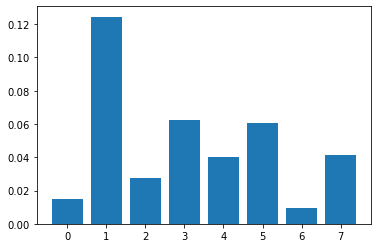

In [11]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()